# Data Visualization

## Assignment 3: Final Project

### Requirements:
- We will finish this class by giving you the chance to use what you have learned in a practical context, by creating data visualizations from raw data. 
- Choose a dataset of interest from the [City of Toronto’s Open Data Portal](https://www.toronto.ca/city-government/data-research-maps/open-data/) or [Ontario’s Open Data Catalogue](https://data.ontario.ca/). 
- Using Python and one other data visualization software (Excel or free alternative, Tableau Public, any other tool you prefer), create two distinct visualizations from your dataset of choice.  
- For each visualization, describe and justify: 
    > What software did you use to create your data visualization?

    > Who is your intended audience? 
    
    > What information or message are you trying to convey with your visualization? 
    
    > What aspects of design did you consider when making your visualization? How did you apply them? With what elements of your plots? 
    
    > How did you ensure that your data visualizations are reproducible? If the tool you used to make your data visualization is not reproducible, how will this impact your data visualization? 
    
    > How did you ensure that your data visualization is accessible?  
    
    > Who are the individuals and communities who might be impacted by your visualization?  
    
    > How did you choose which features of your chosen dataset to include or exclude from your visualization? 
    
    > What ‘underwater labour’ contributed to your final data visualization product?

- This assignment is intentionally open-ended - you are free to create static or dynamic data visualizations, maps, or whatever form of data visualization you think best communicates your information to your audience of choice! 
- Total word count should not exceed **(as a maximum) 1000 words** 

In [17]:
from PIL import Image # to open images
import requests # to get images from URLs
from io import BytesIO # to store images
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests


In [28]:
df = pd.read_csv('/Users/ayeshar/Documents/DSI_Cert/visualization/02_activities/assignments/Washroom Facilities - 4326.csv')

type_counts = (
    df.assign(type=df["type"].fillna("Unknown").astype(str))
      .groupby("type")
      .size()
      .sort_values(ascending=False)
)

type_counts 

type
Washroom Building            353
Portable Toilet               69
Community Centre Washroom      1
dtype: int64

In [45]:
# image files 

cc_washroom = requests.get('https://img.freepik.com/premium-vector/community-center-icon-vector-image-can-be-used-public-utilities_120816-53962.jpg')
ccw_file = BytesIO(cc_washroom.content)
ccw_image = Image.open(ccw_file)

port_toilet = requests.get('https://static.vecteezy.com/system/resources/previews/047/635/211/non_2x/bio-toilet-icon-representing-outdoor-portable-toilet-vector.jpg')
pt_file = BytesIO(port_toilet.content)
pt_image = Image.open(pt_file)


wash_building = requests.get('https://www.shutterstock.com/image-vector/public-toilet-building-icon-black-600nw-2628516417.jpg')
wb_file = BytesIO(wash_building.content)
wb_image = Image.open(wb_file)


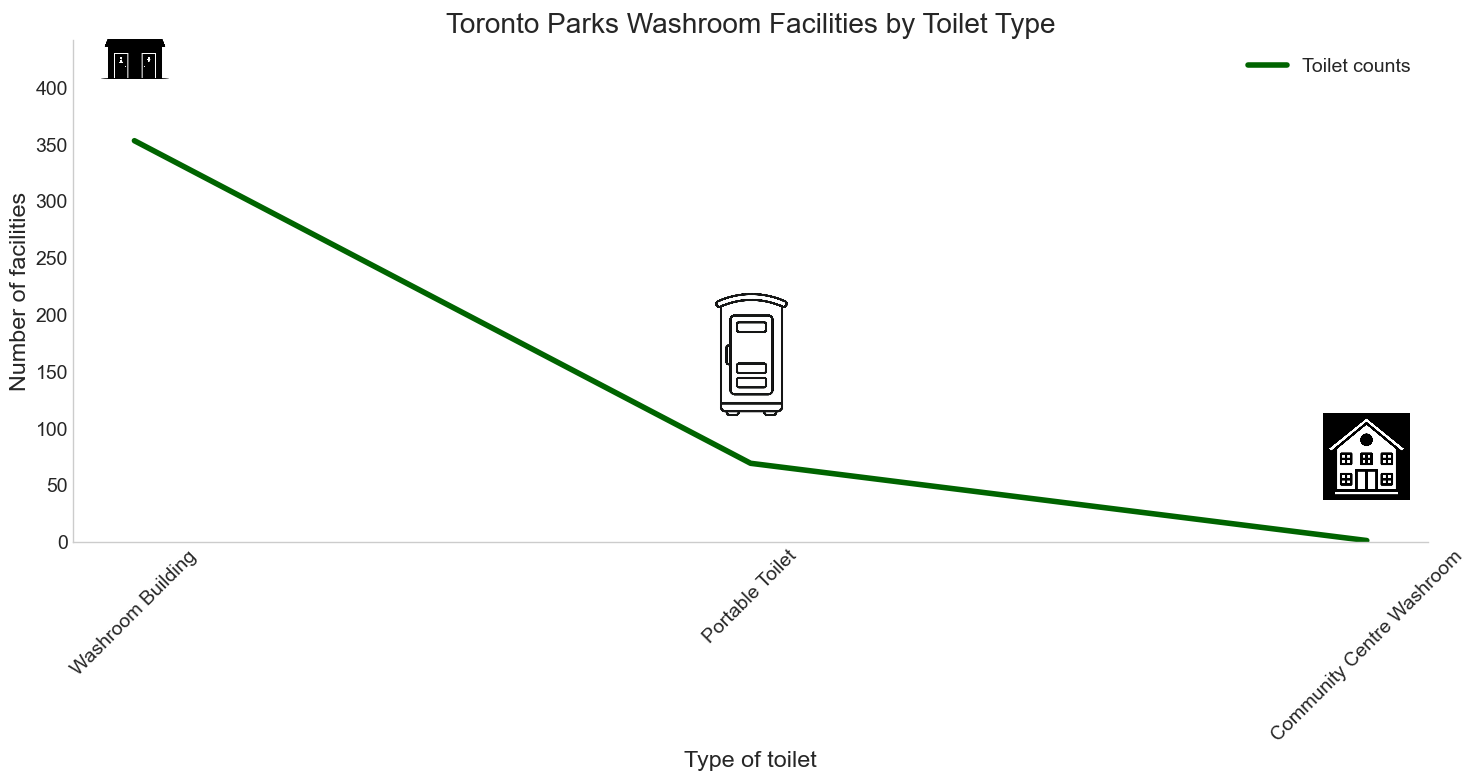

In [96]:
x = type_counts.index
y = type_counts.values

fig, ax = plt.subplots(figsize=(15, 8))

# plot ONLY once (dark green) + label for legend
ax.plot(range(len(x)), y, color="darkgreen", label="Toilet counts")

ax.set_xlabel("Type of toilet")
ax.set_ylabel("Number of facilities")
ax.tick_params(axis="x", labelrotation=45)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_title("Toronto Parks Washroom Facilities by Toilet Type")
ax.grid(False)


# --- map images to your category names (edit keys to match your actual labels in x) ---
icon_map = {
    "Community Centre Washroom": ccw_image,
    "Portable Toilet": pt_image,
    "Washroom Building": wb_image,
}

def add_icon(ax, img, x_pos, y_pos, zoom=0.12):
    oi = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(
        oi, (x_pos, y_pos),
        frameon=False,
        box_alignment=(0.5, 0.0),
        xycoords="data",
        clip_on=False,
        zorder=10,
    )
    ax.add_artist(ab)

y_offset = max(y) * 0.1 if len(y) else 1

for i, cat in enumerate(x):
    cat_str = str(cat)
    if cat_str in icon_map:
        add_icon(ax, icon_map[cat_str], i, y[i] + y_offset, zoom=0.1)

# categorical x labels
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x)

ax.set_ylim(0, max(y) * 1.25)

plt.tight_layout()

fig.savefig("TorontoParksPythonPlot.png",
            dpi=300, bbox_inches="tight", facecolor="white")

plt.show()



    > What software did you use to create your data visualization?

    Python

    > Who is your intended audience? 

    City of Toronto Residents
    
    > What information or message are you trying to convey with your visualization? 

    The different types of available washroom facilities across Toronto parks.
    
    > What aspects of design did you consider when making your visualization? How did you apply them? With what elements of your plots? 

        Clarity & simplicity: Used a single line to show the count by toilet type, with clear axis labels and a descriptive title. Removed the top/right borders to reduce visual clutter.

        Visual hierarchy: Made the data line thicker and dark green so the trend is the first thing viewers notice; kept the background plain white to avoid distraction.

        Interpretability: Rotated x-axis labels to prevent overlap and make category names readable. Added a legend to clarify what the line represents.

        Annotation & engagement: Added icons above each category to help viewers quickly recognize the facility types and to make the plot more approachable for residents.

    
    > How did you ensure that your data visualizations are reproducible? If the tool you used to make your data visualization is not reproducible, how will this impact your data visualization? 
    
        I used a Python script that reads the same source CSV, performs a transparent counting step (groupby/value_counts), and generates the plot using code. Anyone with the file and script can recreate the exact figure.

        To improve reproducibility, I’d keep the script in a version-controlled repo (e.g., Git), and note package versions (e.g., pandas, matplotlib, Pillow).

        One limitation: the icons are pulled from external URLs. If a link changes or disappears, the plot will still reproduce but without icons (or it may error). A fix is to download the icons once and reference local files.

    
    > How did you ensure that your data visualization is accessible?  

        Used high contrast (dark green line on a white background) and large figure size for readability.

        Included clear labels and a title so the plot is understandable without extra context.

        Avoided relying on color alone for meaning (there’s only one series and it’s labeled in the legend).

        To make it more accessible, I would also: add data labels (values) or a small table summary for screen-reader users, ensure a colorblind-safe palette if additional series are added, provide alt text describing the main takeaway.

    > Who are the individuals and communities who might be impacted by your visualization?  

        Toronto residents planning park visits (families, walkers, seniors).

        People who rely on predictable washroom access: parents with young children, pregnant people, older adults, people with disabilities, and people with certain health conditions.

        Visitors and commuters who use parks for recreation or as part of daily routes.

        City planners or advocacy groups interested in identifying gaps in amenities.
    
    > How did you choose which features of your chosen dataset to include or exclude from your visualization? 

        Included only the “type of toilet” field and the count of facilities because the goal was to show a straightforward overview of what kinds of washrooms are available.

    > What ‘underwater labour’ contributed to your final data visualization product?

        Data cleaning/standardization: handling missing toilet types (e.g., filling NAs as “Unknown”), ensuring consistent category labels.

        Data transformation: aggregating to counts per type and ordering categories for readability.

        Design iteration: testing label rotation, margins, line thickness, and icon placement so nothing overlaps or gets cut off.

        Asset preparation: sourcing icons, resizing them consistently, and positioning them relative to plotted points.

        Debugging: resolving issues like unintended second lines, default color cycles, background styling, and layout spacing.     
    